# Exploratory Data Analysis

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 200)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#from fuzzywuzzy import fuzz, process

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import preprocessing  # Own preprocessing function
import importlib
#importlib.reload(preprocessing)

In [ ]:
importlib.reload(preprocessing)

## Import Data

In [3]:
df = preprocessing.get_data(date_="03-19-2020", time_series=False, population=True)

In [45]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Country,Population,ISO3_Code,Income,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap,Death_Rate
0,Afghanistan,16,0,0,Afghanistan,38928341.0,AFG,Low-income countries,16,4.110116e-07,0.000000e+00,0.000000e+00,4.110116e-07,0.000000
1,Albania,42,1,0,Albania,2877800.0,ALB,Upper-middle-income countries,41,1.459448e-05,3.474877e-07,0.000000e+00,1.424699e-05,0.023810
2,Algeria,48,4,12,Algeria,43851043.0,DZA,Upper-middle-income countries,32,1.094615e-06,9.121790e-08,2.736537e-07,7.297432e-07,0.083333
3,Andorra,1,0,1,Andorra,77265.0,AND,High-income countries,0,1.294247e-05,0.000000e+00,1.294247e-05,0.000000e+00,0.000000
4,Antigua and Barbuda,1,0,0,Antigua and Barbuda,97928.0,ATG,High-income countries,1,1.021158e-05,0.000000e+00,0.000000e+00,1.021158e-05,0.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 14 columns):
Country/Region       147 non-null object
Confirmed            147 non-null int64
Deaths               147 non-null int64
Recovered            147 non-null int64
Country              147 non-null object
Population           143 non-null float64
ISO3_Code            143 non-null object
Income               143 non-null object
Active               147 non-null int64
Confirmed_per_Cap    143 non-null float64
Deaths_per_Cap       143 non-null float64
Recovered_per_Cap    143 non-null float64
Active_per_Cap       143 non-null float64
Death_Rate           146 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 17.2+ KB


In [20]:
df[df.Population.isna()]

,Country/Region,Confirmed,Deaths,Recovered,Country,Population,ISO3_Code,Income,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
35,Cruise Ship,696,7,325,Cruise Ship,NaN,NaN,NaN,364,NaN,NaN,NaN,NaN
57,Guernsey,1,0,0,Guernsey,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
73,Jersey,2,0,0,Jersey,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
78,Kosovo,2,0,0,Kosovo,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN


# Analysis

In [18]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Country,Population,ISO3_Code,Income,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap
0,Afghanistan,16,0,0,Afghanistan,38928341.0,AFG,Low-income countries,16,4.110116e-07,0.000000e+00,0.000000e+00,4.110116e-07
1,Albania,42,1,0,Albania,2877800.0,ALB,Upper-middle-income countries,41,1.459448e-05,3.474877e-07,0.000000e+00,1.424699e-05
2,Algeria,48,4,12,Algeria,43851043.0,DZA,Upper-middle-income countries,32,1.094615e-06,9.121790e-08,2.736537e-07,7.297432e-07
3,Andorra,1,0,1,Andorra,77265.0,AND,High-income countries,0,1.294247e-05,0.000000e+00,1.294247e-05,0.000000e+00
4,Antigua and Barbuda,1,0,0,Antigua and Barbuda,97928.0,ATG,High-income countries,1,1.021158e-05,0.000000e+00,0.000000e+00,1.021158e-05


### Total Counts

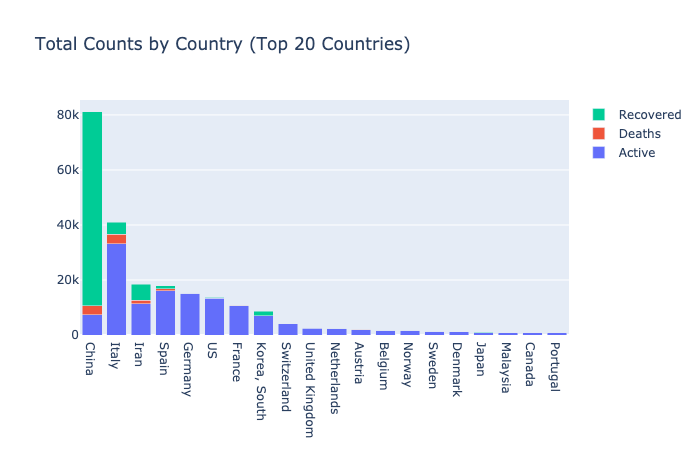

In [4]:
df_sorted = df.sort_values("Confirmed", ascending=False).head(20)

fig = go.Figure(data=[
    go.Bar(name='Active', x=df_sorted['Country/Region'], y=df_sorted.Active,),
    go.Bar(name='Deaths', x=df_sorted['Country/Region'], y=df_sorted.Deaths),
    go.Bar(name='Recovered', x=df_sorted['Country/Region'], y=df_sorted.Recovered),
    ])

#fig.add_trace(go.Scatter(x=df_sorted['Country/Region'], y=df_sorted.Confirmed_per_Cap, mode='markers'))

# Change the bar mode
fig.update_layout(title="Total Counts by Country (Top 20 Countries)", barmode='stack',
                  hovermode='x', height=750, xaxis={'categoryorder':'total descending'})

#fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show('png')
# fig.write_html('data/plots/stacked_bar.html')  # Standalone interactive HTML files
# fig.to_json()  # Embedded into any website

### Active per Cap

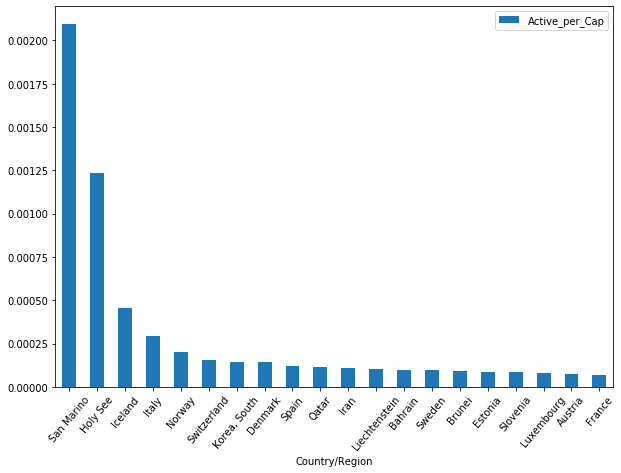

In [116]:
df.sort_values("Active_per_Cap", ascending=False).head(20).plot.bar(y='Active_per_Cap', x='Country/Region', rot=50, figsize=(10,7))

In [35]:
df.groupby("Income").Confirmed.sum()

Income
High-income countries            69235
Low-income countries                51
Lower-middle-income countries      758
No income group available           20
Upper-middle-income countries    96682
Name: Confirmed, dtype: int64

In [59]:
df[df['Country/Region']!="China"].groupby("Income").Confirmed.sum()

Income
High-income countries            69235
Low-income countries                51
Lower-middle-income countries      758
No income group available           20
Upper-middle-income countries    15679
Name: Confirmed, dtype: int64

In [72]:
avg = df.groupby("Income", as_index=False)[['Confirmed_per_Cap', 'Active_per_Cap', 'Deaths_per_Cap', 'Recovered_per_Cap']].mean()*1000000
avg

,Income,Confirmed_per_Cap,Active_per_Cap,Deaths_per_Cap,Recovered_per_Cap
0,High-income countriesHigh-income countriesHigh...,113.895909,105.477477,3.554089,4.864342
1,Low-income countriesLow-income countriesLow-in...,0.253443,0.244038,0.000000,0.009404
2,Lower-middle-income countriesLower-middle-inco...,0.887399,0.860448,0.007325,0.019626
3,No income group availableNo income group avail...,318.848288,318.848288,0.000000,0.000000
4,Upper-middle-income countriesUpper-middle-inco...,9.526783,6.603053,0.335548,2.588182


In [73]:
total = df.groupby("Income", as_index=False)[['Confirmed_per_Cap', 'Active_per_Cap', 'Deaths_per_Cap', 'Recovered_per_Cap']].sum()*1000000
total

,Income,Confirmed_per_Cap,Active_per_Cap,Deaths_per_Cap,Recovered_per_Cap
0,High-income countriesHigh-income countriesHigh...,6719.858639,6223.171155,209.691280,286.996203
1,Low-income countriesLow-income countriesLow-in...,2.534428,2.440384,0.000000,0.094044
2,Lower-middle-income countriesLower-middle-inco...,25.734566,24.952984,0.212419,0.569163
3,No income group availableNo income group avail...,1275.393153,1275.393153,0.000000,0.000000
4,Upper-middle-income countriesUpper-middle-inco...,390.598108,270.725154,13.757484,106.115470


In [74]:
popu =  df.groupby("Income").Population.sum() / 1000000
popu

Income
High-income countries            1249.825715
Low-income countries              349.430846
Lower-middle-income countries    2950.265397
No income group available           1.671509
Upper-middle-income countries    2635.742704
Name: Population, dtype: float64

In [79]:
all_t =  df.groupby("Income")[['Confirmed', 'Deaths', 'Recovered']].sum()
all_t

,Confirmed,Deaths,Recovered
Income,,,
High-income countries,69235,2458,3887
Low-income countries,51,0,2
Lower-middle-income countries,758,23,65
No income group available,20,0,0
Upper-middle-income countries,96682,3952,71755


In [57]:
df[df.Income == "No income group available"]

,Country/Region,Confirmed,Deaths,Recovered,Country,Population,ISO3_Code,Income,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap,Death_Rate
55,Guadeloupe,3,0,0,Guadeloupe,400127.0,GLP,No income group available,3,0.000007,0.0,0.0,0.000007,0.0
60,Holy See,1,0,0,Holy See,809.0,VAT,No income group available,1,0.001236,0.0,0.0,0.001236,0.0
88,Martinique,9,0,0,Martinique,375265.0,MTQ,No income group available,9,0.000024,0.0,0.0,0.000024,0.0
111,Reunion,7,0,0,Réunion,895308.0,REU,No income group available,7,0.000008,0.0,0.0,0.000008,0.0


In [85]:
df[df.Population.isna()]

,Country/Region,Confirmed,Deaths,Recovered,Country,Population,ISO3_Code,Income,Active,Confirmed_per_Cap,Deaths_per_Cap,Recovered_per_Cap,Active_per_Cap,Death_Rate
35,Cruise Ship,696,7,325,Cruise Ship,NaN,NaN,NaN,364,NaN,NaN,NaN,NaN,0.010057
57,Guernsey,1,0,0,Guernsey,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.000000
73,Jersey,2,0,0,Jersey,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.000000
78,Kosovo,2,0,0,Kosovo,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,0.000000


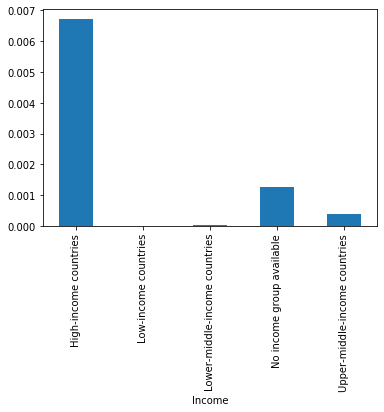

In [56]:
df.groupby("Income").Confirmed_per_Cap.sum().plot.bar()